# Compare the reduced spectra with the HI4PI survey
#### 1/11/22 jpw

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, glob
import math
from astropy.io import fits
import plot_params
%matplotlib inline

### code

In [13]:
HI4PI = '../HI4PI/'
os.chdir(HI4PI)
f = glob.glob('spectrum*.txt')
nf = len(f)
lon = np.asarray([int(f[i][12:].split('.')[0]) for i in range(nf)])
isort = np.argsort(lon)

### plot the HI4PI spectra in order of increasing longitude

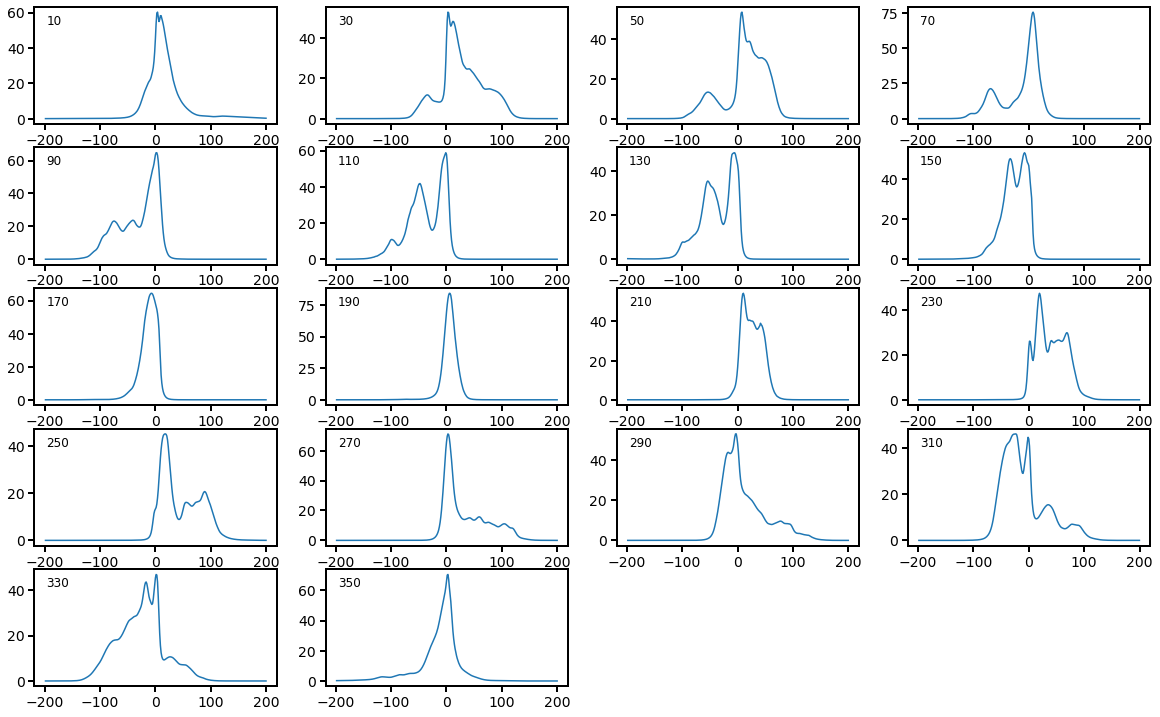

In [14]:
nx = 4
ny = math.ceil(nf/nx)
sx = 20
sy = 0.5 * sx * ny / nx
fig = plt.figure(figsize=(sx,sy))
for i in range(nf):
    j = isort[i]
    ax = fig.add_subplot(ny, nx, i+1)
    v, T = np.loadtxt(f[j], unpack=True)
    ax.plot(v, T)
    ax.text(0.05, 0.85, str(lon[j]), fontsize=12, transform=ax.transAxes)

### compare our data with HI4PI
#### I fudge-scaled our data by a factor of 2 because it was too faint (poor calibration???)

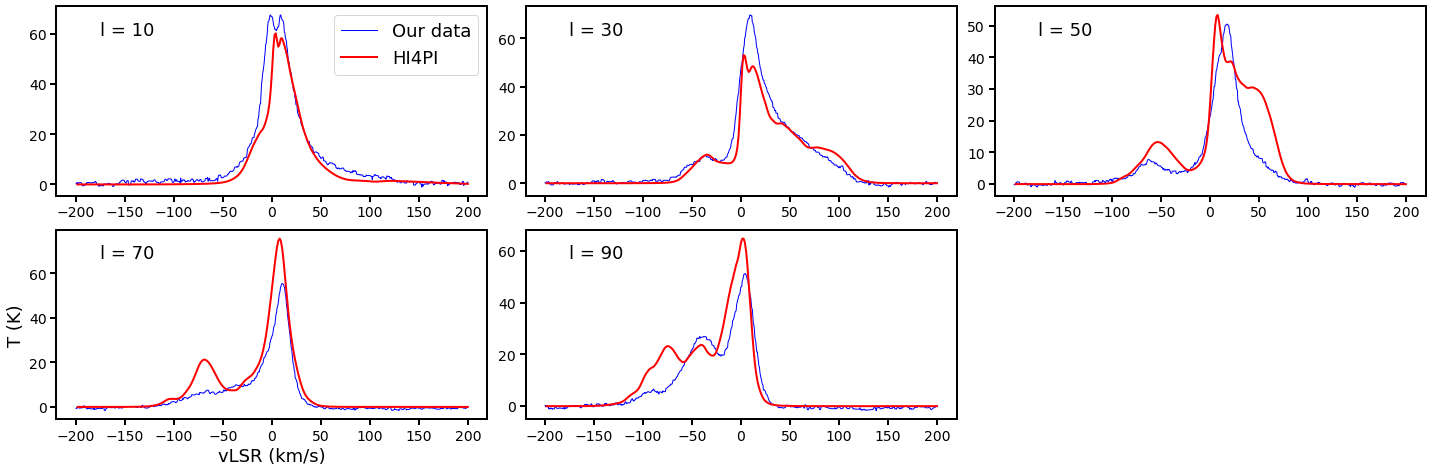

In [23]:
our_data = '../example_data/reduced_spectra/'

nx = 3
ny = math.ceil(5/nx)
sx = 20
sy = 0.5 * sx * ny / nx
fig = plt.figure(figsize=(sx,sy))
for i,l in enumerate([10,30,50,70,90]):
    ax = fig.add_subplot(ny, nx, i+1)
    v, T = np.genfromtxt(our_data+'lon'+str(l)+'_reduced.csv', delimiter=',', unpack=True)
    vHI, THI = np.loadtxt(HI4PI+'spectrum_lon'+str(l)+'.txt', unpack=True)
    
    crop = (v > -200) & (v < 200)
    v = v[crop]
    T = T[crop]
    Tscale_fudge_factor = 2
    ax.plot(v, Tscale_fudge_factor*T, 'b-', lw=1, label='Our data')
    
    ax.plot(vHI, THI, 'r-', lw=2, label='HI4PI')
    ax.text(0.1, 0.85, str('l = {0}'.format(l)), fontsize=18, ha='left', transform=ax.transAxes)
    if i==0:
        ax.legend()
    if i==3:
        ax.set_xlabel('vLSR (km/s)')
        ax.set_ylabel('T (K)')

plt.tight_layout()
#plt.savefig(our_data+'HI4PI_comparison.png', dpi=300)